# Landscape Fragmentation With CLCplus Backbone Dataset


**Objective**: Utilize the CLC+ Backbone Land Cover 2023 dataset to assess the degree of landscape fragmentation and understand landscape composition within selected Areas of Interest (AOIs).

**Description**: This notebook demonstrates how to use the CLC+ Backbone Land Cover 2023 dataset to calculate spatial metrics that quantify landscape fragmentation.
Users can select AOIs and compute key indicators such as:

- Boundary Length – the total length of boundaries between land cover classes within an AOI.

- Edge Density – the ratio of total edge length to area, indicating how fragmented or heterogeneous the landscape is.

Additionally, the notebook allows users to compute these metrics between specific land cover classes (e.g., forest–urban, agricultural–natural) to analyze fragmentation patterns between selected landscape types.

The workflow combines geospatial data processing, raster analysis, and statistical computation, providing both quantitative metrics and visual insights into the spatial structure of the landscape.

**Results and knowledge gain**:
By the end of this notebook, users will be able to:

- Quantify landscape fragmentation using CLC+ Backbone data.

- Understand how boundary length and edge density reflect spatial heterogeneity and land-use transitions.

- Compare fragmentation between different land cover classes to identify key transition zones.

- Gain practical experience in applying geospatial analysis techniques with Python.

- Visually interpret fragmentation patterns through maps and plots that enhance ecological and spatial understanding.

## 1. Introduction

Landscape fragmentation is a key process influencing both natural ecosystems and human-dominated environments. It describes the subdivision of continuous land cover into smaller, often disconnected patches, resulting from a variety of land-use changes such as urban expansion, infrastructure development, and agricultural intensification. While fragmentation can disrupt ecological connectivity and reduce habitat quality, it also reflects broader patterns of spatial organization, land management, and territorial planning.

Understanding the structure and degree of fragmentation is essential not only for assessing habitat integrity and biodiversity but also for supporting sustainable spatial development. Highly fragmented areas can indicate zones of competing land uses, urban sprawl, or inefficient landscape configuration — all of which have implications for planning, infrastructure placement, and resource management. Conversely, landscapes with low fragmentation tend to exhibit stronger ecological coherence and can support more efficient land-use planning and green infrastructure design.

In this notebook, we use the CLC+ Backbone Land Cover 2023 dataset to analyze landscape fragmentation within selected Areas of Interest (AOIs). Through the computation of spatial metrics such as boundary length and edge density, users can quantify the degree of fragmentation and explore transitions between different land cover classes. These metrics provide valuable insights into both ecological patterns and human-induced landscape dynamics, supporting evidence-based decision-making in environmental monitoring, spatial planning, and sustainable land management.

We begin by installing the necessary packages.

In [ ]:
packages = ['rasterio', 'folium', 'numpy', 'matplotlib', 'pandas', 
           'seaborn', 'branca', 'Pillow', 'ipywidgets']

for package in packages:
    !pip install -q {package}
    print(f"{package} installed")

print("Done.")

rasterio installed
folium installed
numpy installed
matplotlib installed
pandas installed
seaborn installed
branca installed
scipy installed
Pillow installed
ipywidgets installed
Done.


We can now import the required libraries. Most of the functions that we will use are custom-defined, and they are located in the `modules/` directory.
Additionally, below we also define constant variables that will be used throughout the notebook. 

In [1]:
from modules.regions_dict import regions_dict
from modules.analysis import (calculate_class_areas,
                            print_class_areas,
                            get_boundary_length,
                            get_boundary_length_per_class_pair
                            )
from modules.utils import choose_region, visualize_class_pair_boundaries, plot_discrete_histogram, CLC_CLASS_INFO
from modules.maps import display_map_discrete

from IPython.display import Image, display

# path to area-of-interest rasters directory
rasters_dir = 'aoi_rasters/'

### CLCplus Backbone 2023

Land cover data describe the physical and biological surface characteristics of the Earth, such as forests, agricultural areas, urban zones, water bodies, and wetlands. These datasets provide a spatially explicit view of how land is utilized and transformed over time, making them fundamental for understanding environmental patterns, ecological processes, and human impacts on the landscape. High-quality land cover data are crucial for analyzing spatial structure, monitoring change, and supporting sustainable land management and policy decisions.

The usability, applications, and importance of land cover information span multiple domains. In environmental science, it supports biodiversity assessments, habitat mapping, and ecological modelling. In land-use planning and resource management, it provides an objective basis for evaluating development patterns and identifying areas of ecological significance or risk. For climate and sustainability research, land cover data are key inputs to models that quantify carbon fluxes, monitor deforestation, and evaluate land degradation. By providing consistent, comparable, and repeatable spatial data, land cover products enable evidence-based decision-making at local, regional, and continental scales.

The CLCplus Backbone (CLC+ Backbone) 2023 dataset, produced by the Copernicus Land Monitoring Service (CLMS), serves as the foundation for the exercises in this notebook. It provides a high-resolution (10 m) representation of land cover across Europe, covering the EEA38 countries and the United Kingdom. Each pixel represents the dominant land cover class, classified into 11 standardized categories. The dataset reflects conditions for the reference year 2023.

In this notebook, we will take a closer look at landscape composition and fragmentation using the example of National Parks in Poland. To gain an initial overview, in the cell below we display the CLC+ Backbone land cover map for Poland with the locations of its 23 National Parks. 

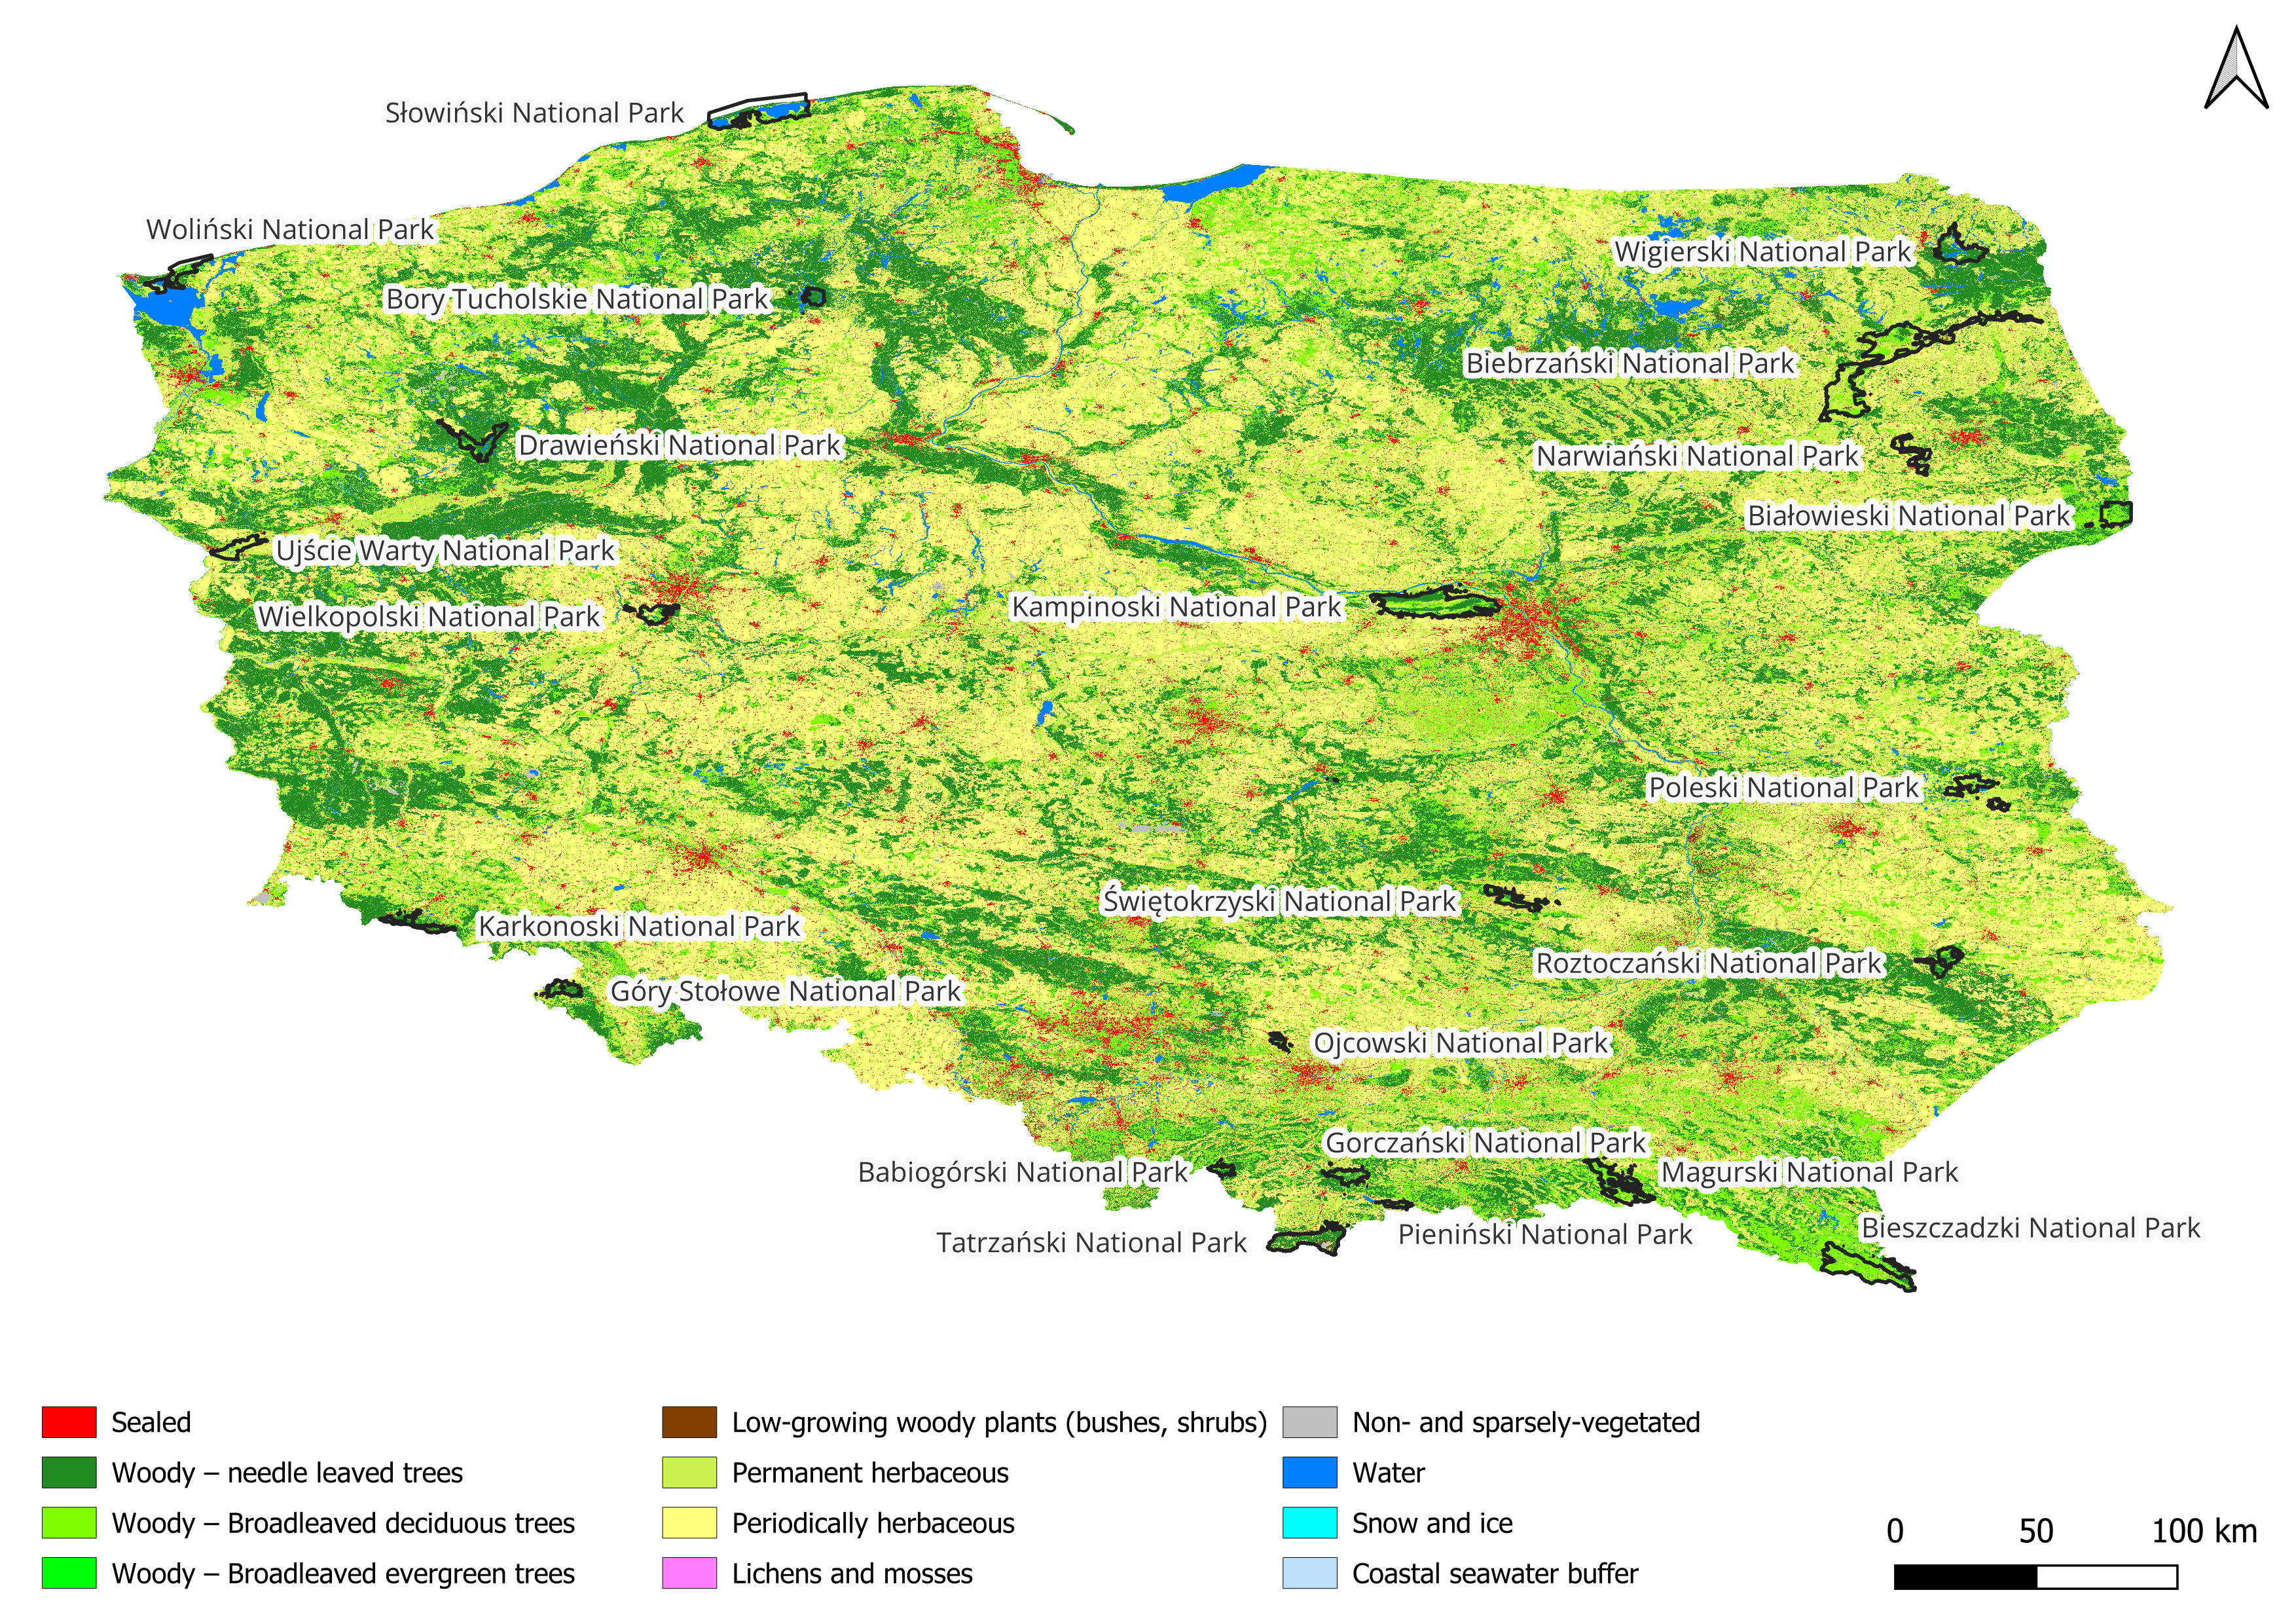

In [2]:
# Display the Poland national parks PNG image
png_file = 'images/Poland_National_Park_Location_Map.png'
display(Image(png_file, width=1000))

### Selection of area for further analysis

In the following section, we will focus on specific National Park in Poland, which will allow us to examine the spatial detail of the 10-meter resolution CLCplus Backbone (CLC+ BB) land cover dataset. The variable regions_dict, imported from modules/regions_dict.py, contains information about all the National Parks available for analysis in this notebook.

Let us display the full list of available parks stored in regions_dict:

In [3]:
print(f'Areas available for analysis:')
for i, region in enumerate(regions_dict.keys()):
    print(f'    {i+1}. {region}')

Areas available for analysis:
    1. Babiogorski National Park
    2. Bialowieski National Park
    3. Biebrzanski National Park
    4. Bieszczadzki National Park
    5. Bory Tucholskie National Park
    6. Drawienski National Park
    7. Gorczanski National Park
    8. Gory Stolowe National Park
    9. Kampinoski National Park
    10. Karkonoski National Park
    11. Magurski National Park
    12. Narwianski National Park
    13. Ojcowski National Park
    14. Pieninski National Park
    15. Poleski National Park
    16. Roztoczanski National Park
    17. Slowinski National Park
    18. Swietokrzyski National Park
    19. Tatrzanski National Park
    20. Ujscie Warty National Park
    21. Wielkopolski National Park
    22. Wigierski National Park
    23. Wolinski National Park


Please choose one of the National Parks from the dropdown menu below:

In [4]:
chosen_region = choose_region(regions_dict)

Dropdown(description='Region:', options=('Babiogorski National Park', 'Bialowieski National Park', 'Biebrzansk…

## 2. Visualization of CLCplus Backbone dataset for the selected National Park

In this section, we visualize the CLCplus Backbone 2023 land cover dataset for the National Park selected in the dropdown menu. To enable efficient data handling, the dataset used throughout this notebook has been preprocessed — each National Park has been cropped from the CLC+ Backbone dataset and saved as an individual raster file in the directory aoi_rasters/.

The cell below generates an interactive map using the display_map_discrete() function from the module module/maps.py. This map overlays the CLCplus Backbone land cover classes on an OpenStreetMap base map, allowing for visual exploration of the land cover composition within the selected National Park.


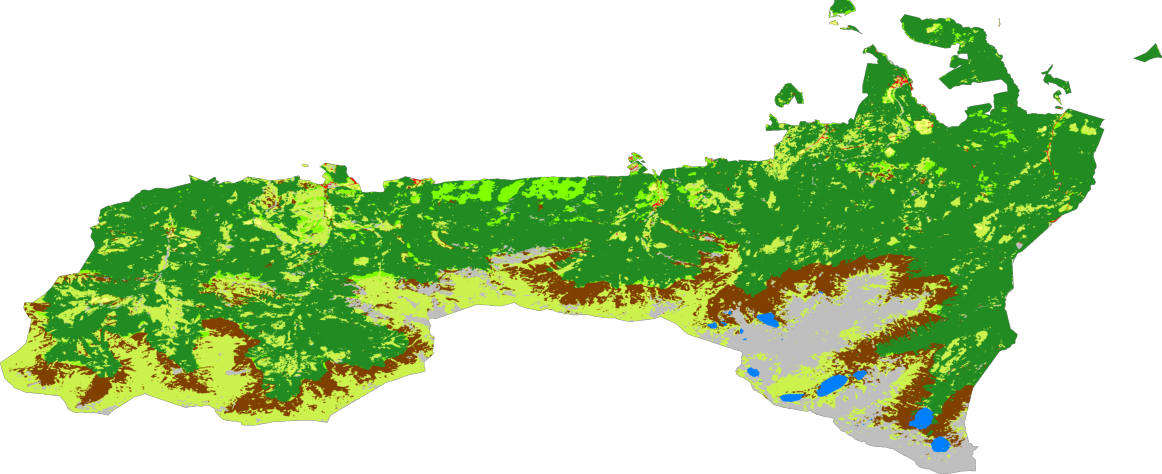

In [5]:
# Using display_map_discrete for categorical/discrete land cover data
base_map = 'OpenStreetMap'

clc_discrete_setup = {
    'label': "CLCplusBB",
    'layer_name': "Land Cover Classes",
    'opacity': 0.8
}

# display_map_discrete is specifically designed for discrete/categorical data
display_map_discrete(rasters_dir, chosen_region[0], base_map, 
                    clc_discrete_setup, 
                    class_info=CLC_CLASS_INFO,
                    map_size=(800, 600),
                    target_projection='4326'
)

## 3. Calculating layer statistics

In Section 2, we have visualized the land cover map of our chosen National Park and explored its characteristics and patterns.
Here, we focus on summarizing and analyzing the data through statistical metrics and visualization using functions imported from `module/analysis.py`.

Let’s begin by calculating the total area (in hectares) of the National Park and determining the area and proportion of each land cover class:

In [6]:
# Calculate area statistics with the fixed function
area_results = calculate_class_areas(
    rasters_dir=rasters_dir,
    chosen_region=chosen_region[0],
    dataset_label='CLCplusBB',
    target_projection='4326',
    class_info=CLC_CLASS_INFO
)

# Print formatted results
print_class_areas(area_results)

Land Cover Area Analysis
-----------------------------------
Region: Tatrzanski National Park
Total area: 20949.42 ha

Class ID Class Name                                    Area (ha)    Area (%)  
----------------------------------------------------------------------
2        Woody-needle leaved trees                     11214.72     53.5      
6        Permanent herbaceous                          4693.82      22.4      
5        Low-growing woody plants (bushes, shrubs)     2310.11      11.0      
9        Non- and sparsely-vegetated                   1830.61      8.7       
3        Woody-Broadleaved deciduous trees             660.30       3.2       
10       Water                                         145.28       0.7       
7        Periodically herbaceous                       62.71        0.3       
1        Sealed                                        31.85        0.2       
----------------------------------------------------------------------
Total                       

After obtaining the area and percentage of each land cover class, we can better understand their distribution by plotting a histogram. Only classes present within the park are included.

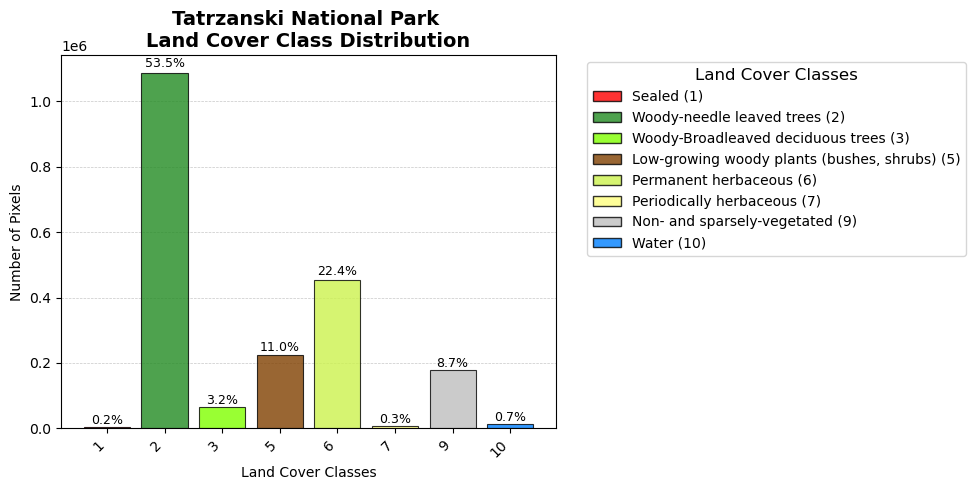

In [7]:
# Create histogram with class colors
plot_discrete_histogram(
    rasters_dir=rasters_dir,
    chosen_region=chosen_region[0],
    dataset_label='CLCplusBB',
    class_info=CLC_CLASS_INFO,
    target_projection='4326',
    figure_size=(10, 5),
    title=f'{chosen_region[0]} \nLand Cover Class Distribution'
)

We are now going to examine the spatial structure of the park’s land cover by calculating two landscape metrics: __boundary length__ and __edge density__. These metrics describe how land cover types are arranged and how much contact exists between them, providing insights into landscape fragmentation and heterogeneity.

__Boundary Length__

Boundary length refers to the total length of all edges or borders between different land cover or land use classes within a defined area. It is typically measured in meters or kilometers and represents the amount of contact between distinct spatial units.

This metric provides insight into the structural complexity and spatial configuration of a landscape. A longer total boundary length generally indicates a more heterogeneous or fragmented pattern, where multiple classes meet or transition frequently. Conversely, a shorter boundary length suggests a more homogeneous and continuous spatial structure.

Boundary length is a versatile measure used in both ecological and urban studies. In ecological contexts, it can help describe habitat fragmentation or connectivity, while in urban or land use analyses it can characterize spatial mixing, zoning complexity, or development patterns. Overall, it serves as a useful indicator of how land cover types are distributed and interact within a landscape.

__Edge Density__

Edge density is a metric based on boundary length that describes the amount of edge relative to the size of a landscape. It provides a standardized way to quantify spatial complexity and fragmentation, allowing for meaningful comparisons between landscapes or different land cover types.

Higher edge density values indicate a landscape with more boundaries and greater heterogeneity, while lower values reflect a simpler, more continuous spatial structure.

In [ ]:
# Construct the raster path based on the chosen region
region_filename = regions_dict[chosen_region[0]][2]
raster_path = f'aoi_rasters/CLCplusBB_{region_filename}_3035.tif'
print(chosen_region[0])
print("-"*35)

# Get total boundary length and edge density
boundary_length, edge_density = get_boundary_length(raster_path=raster_path, return_density=True)

print(f'Total Boundary Length: {boundary_length} kilometers')
print(f'Edge Density: {edge_density} meters per square meter')

Tatrzanski National Park
-----------------------------------
pixel size: 10.0
Total Boundary Length: 3147.5 kilometers
Edge Density: 0.014861 meters per square meter


Now we can compute boundary length and edge density for each of the land cover types and visualize the results as a confusion matrix

In [1]:
# Get boundary length per class pair for the confusion matrix visualization
boundary_results = get_boundary_length_per_class_pair(raster_path, input_nodata=254, class_info=CLC_CLASS_INFO)

# Visualize class pair boundaries as a confusion matrix
visualize_class_pair_boundaries(boundary_results, class_info=CLC_CLASS_INFO, use_names=True, metric='both', figsize=(12, 10))

NameError: name 'get_boundary_length_per_class_pair' is not defined